<a href="https://colab.research.google.com/github/CH0900/114-1Business-Intelligence/blob/main/0917_week2_5113029043.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b>取得股價資料</b>

## 使用 Yahoo Finance 取得資料

In [1]:
!pip install yfinance

In [2]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [3]:
# 輸入股票代號
stock_id = "2344.tw"
# stock_id = "2330.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=360)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-4063770710.py:20: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2024-09-27,21.450001,21.549999,21.250000,21.299999,36180032
1,2024-09-30,21.350000,21.750000,21.150000,21.200001,31334603
2,2024-10-01,21.000000,21.450001,20.900000,21.350000,20181820
3,2024-10-04,20.850000,21.250000,20.700001,21.000000,17727492
4,2024-10-07,20.700001,21.000000,20.549999,20.950001,14585573
...,...,...,...,...,...,...
233,2025-09-15,26.799999,27.100000,25.700001,26.950001,467481131
234,2025-09-16,27.950001,28.900000,25.750000,26.500000,639359881
235,2025-09-17,29.400000,29.799999,27.299999,28.100000,442590512
236,2025-09-18,32.299999,32.299999,30.250000,30.250000,445214363


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（SMA）

In [4]:
# 計算8日 SMA
df['8_SMA'] = df['Close'].rolling(window=8).mean()

# 計算13日 SMA
df['13_SMA'] = df['Close'].rolling(window=13).mean()

# 計算20日 SMA
df['20_SMA'] = df['Close'].rolling(window=20).mean()
df['40_SMA'] = df['Close'].rolling(window=40).mean()
df['60_SMA'] = df['Close'].rolling(window=60).mean()

# 列印最後筆數
df.tail()

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,40_SMA,60_SMA
233,2025-09-15,26.799999,27.100000,25.700001,26.950001,467481131,24.30000,22.619231,21.2100,19.41625,19.337500
234,2025-09-16,27.950001,28.900000,25.750000,26.500000,639359881,25.23125,23.261539,21.6775,19.68000,19.476667
235,2025-09-17,29.400000,29.799999,27.299999,28.100000,442590512,26.08750,24.007692,22.2475,19.98625,19.632500
236,2025-09-18,32.299999,32.299999,30.250000,30.250000,445214363,27.05000,24.930769,22.9425,20.35375,19.833333
237,2025-09-19,33.500000,34.299999,32.500000,34.000000,580346156,28.16875,25.973077,23.7075,20.75750,20.044167


## 1.2 計算相對強弱指數（RSI）

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-01.jpg" alt="rsi" width="500"/>

<img src="https://images.stockfeel.com.tw/stockfeelimage/2015/10/%E6%95%99%E4%BD%A0%E7%9C%8B%E6%87%82-RSI-%E7%9B%B8%E5%B0%8D%E5%BC%B7%E5%BC%B1%E6%8C%87%E6%A8%99-02.jpg" alt="rs" width="500"/>

In [5]:
# 計算每個交易日的價格變動，即當天收盤價與前一天收盤價的差異
df['Change'] = df['Close'] - df['Close'].shift(1)

# 將變動值中的正數部分視為“Gain”（增益），如果變動為負則記為0
df['Gain'] = df['Change'].apply(lambda x: x if x > 0 else 0)

# 將變動值中的負數部分視為“Loss”（損失），取其絕對值，如果變動為正則記為0
df['Loss'] = df['Change'].apply(lambda x: abs(x) if x < 0 else 0)

df.tail()

# 計算過去14個交易日的平均增益
df['Avg Gain'] = df['Gain'].rolling(window=14).mean()

# 計算過去14個交易日的平均損失
df['Avg Loss'] = df['Loss'].rolling(window=14).mean()

# 計算相對強弱指數的相對強度（RS），即平均增益與平均損失的比值
df['RS'] = df['Avg Gain'] / df['Avg Loss']

# 計算相對強弱指數（RSI），使用RS公式計算出來
df['RSI'] = 100 - (100 / (1 + df['RS']))

# 顯示最後幾行的數據
# df.tail()
# print(df)
df

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,40_SMA,60_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI
0,2024-09-27,21.450001,21.549999,21.250000,21.299999,36180032,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.00,NaN,NaN,NaN,NaN
1,2024-09-30,21.350000,21.750000,21.150000,21.200001,31334603,NaN,NaN,NaN,NaN,NaN,-0.100000,0.000000,0.10,NaN,NaN,NaN,NaN
2,2024-10-01,21.000000,21.450001,20.900000,21.350000,20181820,NaN,NaN,NaN,NaN,NaN,-0.350000,0.000000,0.35,NaN,NaN,NaN,NaN
3,2024-10-04,20.850000,21.250000,20.700001,21.000000,17727492,NaN,NaN,NaN,NaN,NaN,-0.150000,0.000000,0.15,NaN,NaN,NaN,NaN
4,2024-10-07,20.700001,21.000000,20.549999,20.950001,14585573,NaN,NaN,NaN,NaN,NaN,-0.150000,0.000000,0.15,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,2025-09-15,26.799999,27.100000,25.700001,26.950001,467481131,24.30000,22.619231,21.2100,19.41625,19.337500,1.349998,1.349998,0.00,0.617857,0.042857,14.416700,93.513527
234,2025-09-16,27.950001,28.900000,25.750000,26.500000,639359881,25.23125,23.261539,21.6775,19.68000,19.476667,1.150002,1.150002,0.00,0.625000,0.042857,14.583370,93.582903
235,2025-09-17,29.400000,29.799999,27.299999,28.100000,442590512,26.08750,24.007692,22.2475,19.98625,19.632500,1.449999,1.449999,0.00,0.728571,0.028571,25.500021,96.226418
236,2025-09-18,32.299999,32.299999,30.250000,30.250000,445214363,27.05000,24.930769,22.9425,20.35375,19.833333,2.900000,2.900000,0.00,0.928571,0.028571,32.500026,97.014928


## 1.3 計算平滑異同移動平均線（MACD）

In [6]:
'''
第一日
# 平滑係數公式： α = 2 / (span + 1) = 2 / (span + 1)
# α = 2 / (8 + 1) = 2 / (8 + 1) ≈ 0.2222
# 0.2222 * 770.0 + (1-0.2222) * 776.0 = 171.094 + 603.5728 = 774.6668
'''

# 計算8天的指數移動平均線（EMA），並將其存儲在 'EMA_8' 列中
# adjust=False 表示在計算 EMA 時，只考慮當前值和前一個 EMA 的遞歸計算方式，而不考慮所有歷史數據
df['EMA_8'] = df['Close'].ewm(span=8, adjust=False).mean()

# 計算13天的指數移動平均線（EMA），並將其存儲在 'EMA_13' 列中
df['EMA_13'] = df['Close'].ewm(span=13, adjust=False).mean()

# 計算MACD線：8天EMA減去13天EMA，並將其存儲在 'MACD' 列中
df['MACD'] = df['EMA_8'] - df['EMA_13']

# 顯示DataFrame的最後幾行數據
df.head(3)

Price,Date,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,40_SMA,...,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
0,2024-09-27,21.450001,21.549999,21.25,21.299999,36180032,NaN,NaN,NaN,NaN,...,NaN,0.0,0.00,NaN,NaN,NaN,NaN,21.450001,21.450001,0.000000
1,2024-09-30,21.350000,21.750000,21.15,21.200001,31334603,NaN,NaN,NaN,NaN,...,-0.10,0.0,0.10,NaN,NaN,NaN,NaN,21.427778,21.435715,-0.007937
2,2024-10-01,21.000000,21.450001,20.90,21.350000,20181820,NaN,NaN,NaN,NaN,...,-0.35,0.0,0.35,NaN,NaN,NaN,NaN,21.332717,21.373470,-0.040753


# <b>2. 資料可視化</b>
K 線型態的捕捉

## 2.1 可視化收盤價折線圖

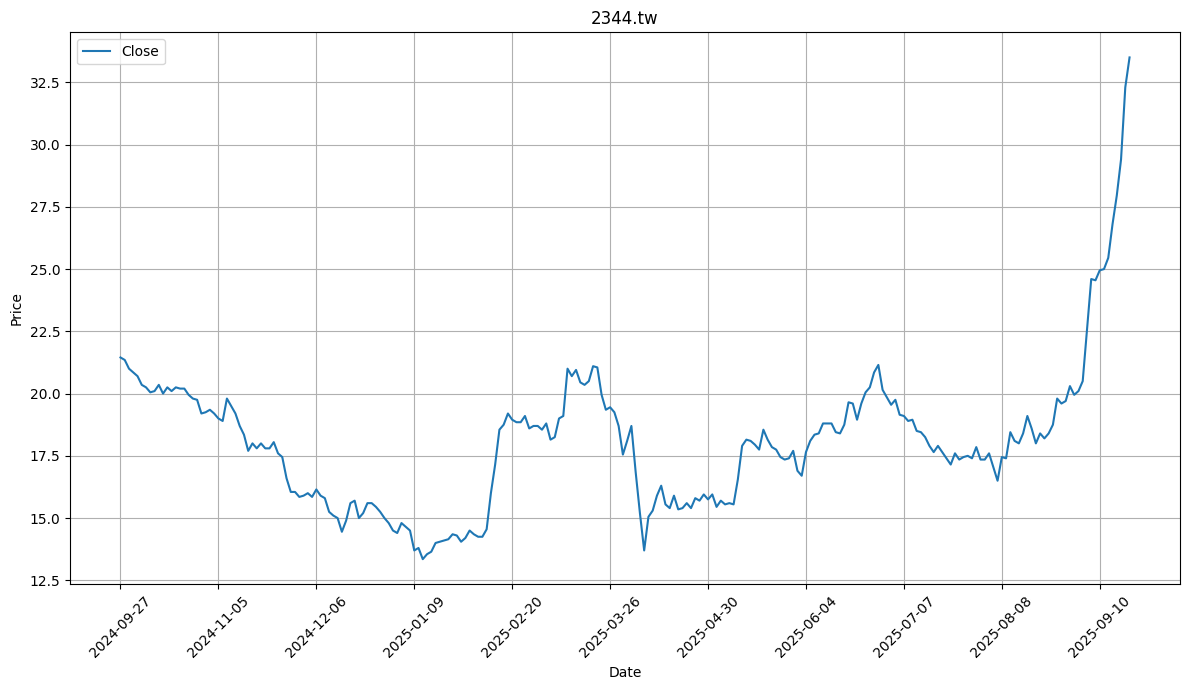

In [7]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

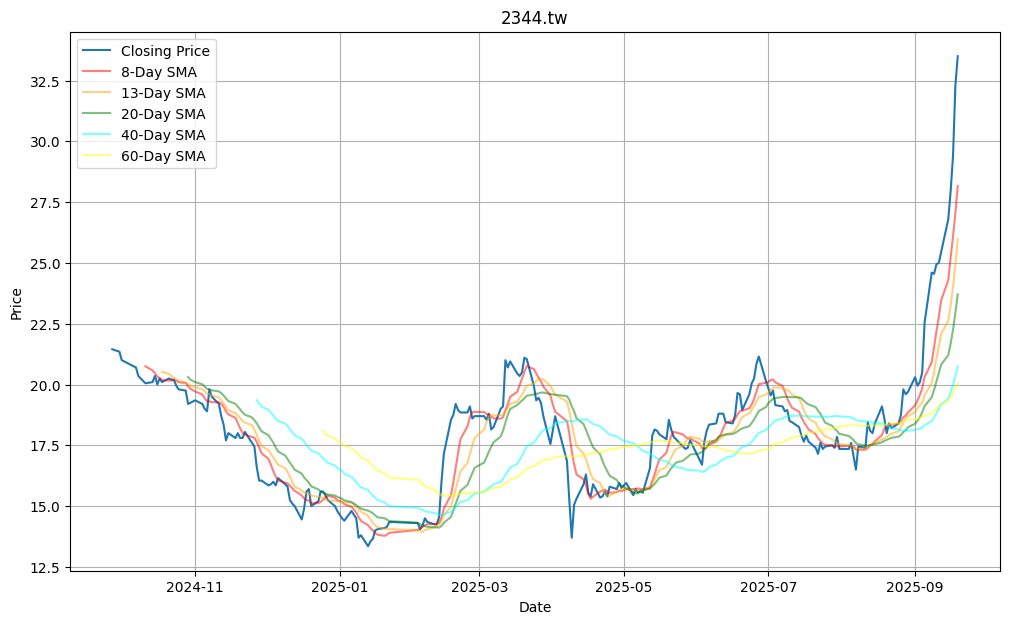

In [8]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 8 天的 SMA
plt.plot(df['Date'], df['8_SMA'], label='8-Day SMA', color='red', alpha=.5)

# 13 天的 SMA
plt.plot(df['Date'], df['13_SMA'], label='13-Day SMA', color='orange', alpha=.5)

# 20 天的 SMA
plt.plot(df['Date'], df['20_SMA'], label='20-Day SMA', color='green', alpha=.5)
plt.plot(df['Date'], df['40_SMA'], label='40-Day SMA', color='cyan', alpha=.5)
plt.plot(df['Date'], df['60_SMA'], label='60-Day SMA', color='yellow', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [9]:
!pip install mplfinance

In [10]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2025-08-01':'2025-09-22'].tail()

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,40_SMA,60_SMA,Change,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD
Date,,,,,,,,,,,,,,,,,,,,
2025-09-15,26.799999,27.100000,25.700001,26.950001,467481131,24.30000,22.619231,21.2100,19.41625,19.337500,1.349998,1.349998,0.0,0.617857,0.042857,14.416700,93.513527,24.397231,23.220585,1.176646
2025-09-16,27.950001,28.900000,25.750000,26.500000,639359881,25.23125,23.261539,21.6775,19.68000,19.476667,1.150002,1.150002,0.0,0.625000,0.042857,14.583370,93.582903,25.186736,23.896216,1.290520
2025-09-17,29.400000,29.799999,27.299999,28.100000,442590512,26.08750,24.007692,22.2475,19.98625,19.632500,1.449999,1.449999,0.0,0.728571,0.028571,25.500021,96.226418,26.123016,24.682471,1.440546
2025-09-18,32.299999,32.299999,30.250000,30.250000,445214363,27.05000,24.930769,22.9425,20.35375,19.833333,2.900000,2.900000,0.0,0.928571,0.028571,32.500026,97.014928,27.495679,25.770689,1.724990
2025-09-19,33.500000,34.299999,32.500000,34.000000,580346156,28.16875,25.973077,23.7075,20.75750,20.044167,1.200001,1.200001,0.0,0.971429,0.028571,34.000033,97.142860,28.829973,26.874876,1.955097


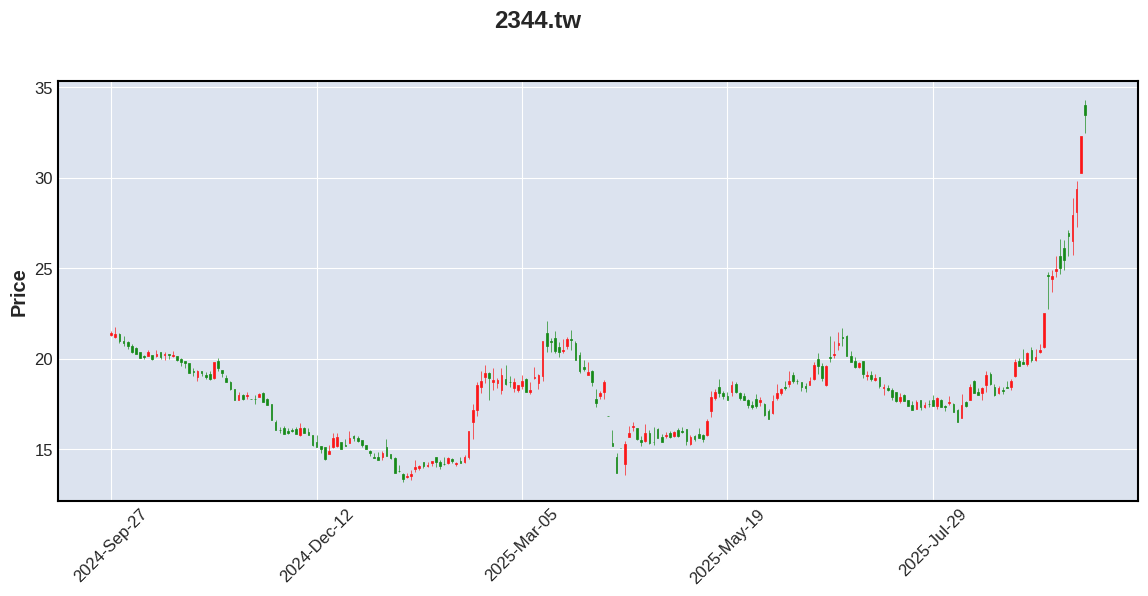

In [11]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [12]:
# 原時間區間沒有hammer圖形，延長時間區間Demo
start_H = dt.datetime(2020, 1, 1)  # 指定的開始日期
end_H = end    # 指定的結束日期

# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df_H = yf.download(stock_id, start=start_H, end=end_H).reset_index()

# 刪除 Ticker 欄位並取代
df_H.columns = df_H.columns.droplevel('Ticker')

# 計算 K 線長度 = abs(收盤-開盤)
df_H['body_length'] = abs(df_H['Close'] - df_H['Open'])

# 計算下影線長度 = abs(最高-最小)
df_H['lower_shadow'] = abs(df_H['Low'] - df_H[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df_H['upper_shadow'] = abs(df_H['High'] - df_H[['Open', 'Close']].max(axis=1))

print('df_H',df_H)
# 定義 Hammer 型態的條件
hammer_condition = (
    (df_H['lower_shadow'] > 2 * df_H['body_length']) &  # 下影線長於實體的两倍
    (df_H['upper_shadow'] < df_H['body_length'] * 0.1) &  # 上影線很短
    (df_H['body_length'] < (df_H['High'] - df_H['Low']) * 0.4)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df_H[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

/tmp/ipython-input-3308432685.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_H = yf.download(stock_id, start=start_H, end=end_H).reset_index()
[*********************100%***********************]  1 of 1 completed

df_H Price       Date      Close       High        Low       Open     Volume  \
0     2020-01-02  17.861187  18.270221  17.861187  18.042980   59894947   
1     2020-01-03  18.088428  18.224774  17.724843  18.224774   58869257   
2     2020-01-06  17.679394  18.724705  17.588497  18.179325  147957153   
3     2020-01-07  17.315805  17.997530  17.088565  17.861186   45397796   
4     2020-01-08  17.361258  17.633946  17.315808  17.361258   29095750   
...          ...        ...        ...        ...        ...        ...   
1384  2025-09-15  26.799999  27.100000  25.700001  26.950001  467481131   
1385  2025-09-16  27.950001  28.900000  25.750000  26.500000  639359881   
1386  2025-09-17  29.400000  29.799999  27.299999  28.100000  442590512   
1387  2025-09-18  32.299999  32.299999  30.250000  30.250000  445214363   
1388  2025-09-19  33.500000  34.299999  32.500000  34.000000  580346156   

Price  body_length  lower_shadow  upper_shadow  
0         0.181793      0.000000      0.22724

Price,Close,High,Low,Open,Volume,body_length,lower_shadow,upper_shadow
Date,,,,,,,,
2020-01-03,18.088428,18.224774,17.724843,18.224774,58869257,0.136346,0.363585,0.0
2020-03-26,10.589457,10.680352,10.089525,10.680352,30368169,0.090896,0.499932,0.0
2020-06-23,12.361941,12.407390,12.180148,12.407390,15130802,0.045448,0.181793,0.0
2021-03-19,25.821470,25.821470,25.134729,25.638341,102186679,0.183129,0.503612,0.0
2021-04-15,31.223833,31.590095,30.491308,31.590095,135181421,0.366262,0.732525,0.0
2022-02-14,29.559717,30.020149,28.546768,30.020149,82462755,0.460432,1.012949,0.0
2022-04-21,26.244610,26.336696,25.784179,26.336696,38129423,0.092086,0.460430,0.0
2022-08-18,21.369062,21.369062,21.034423,21.321256,10695632,0.047806,0.286833,0.0
2022-11-29,20.317341,20.460757,19.982703,20.460757,14290552,0.143416,0.334638,0.0


Hammer 型態數量：16


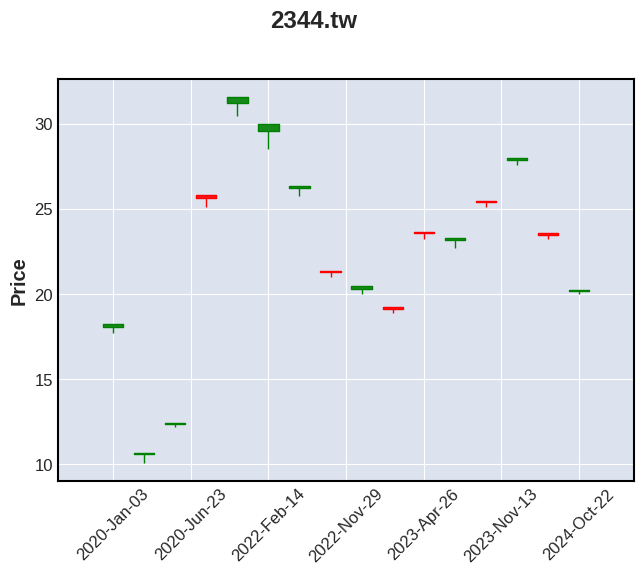

In [13]:
print(f"Hammer 型態數量：{len(hammer_df)}")
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [14]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

Price,Close,High,Low,Open,Volume,8_SMA,13_SMA,20_SMA,40_SMA,60_SMA,...,Gain,Loss,Avg Gain,Avg Loss,RS,RSI,EMA_8,EMA_13,MACD,body_length
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-20,17.799999,17.799999,17.799999,17.799999,24850865,18.19375,18.611539,18.9725,NaN,NaN,...,0.000000,0.200001,0.107143,0.210714,0.508474,33.707859,18.198383,18.503669,-0.305286,0.000000
2024-11-21,17.799999,18.000000,17.500000,17.799999,31582075,18.01875,18.503846,18.8525,NaN,NaN,...,0.000000,0.000000,0.100000,0.210714,0.474576,32.183896,18.109853,18.403145,-0.293292,0.000000
2024-11-29,16.049999,16.250000,15.900000,16.049999,24316297,17.17500,17.480769,18.0775,19.08750,NaN,...,0.000000,0.000000,0.053571,0.278572,0.192308,16.129027,16.978873,17.418570,-0.439698,0.000000
2025-01-10,13.800000,14.150000,13.750000,13.800000,19494666,14.39375,14.773077,14.8950,15.77250,16.992500,...,0.100000,0.000000,0.078572,0.164286,0.478261,32.352957,14.358014,14.609431,-0.251417,0.000000
2025-02-05,14.200000,14.600000,14.150000,14.200000,24625125,14.15000,13.942308,14.1950,14.83625,15.916667,...,0.150000,0.000000,0.089286,0.121429,0.735294,42.372884,14.141019,14.179995,-0.038976,0.000000
2025-02-27,18.700001,19.049999,18.450001,18.700001,88088912,18.87500,17.807693,16.5750,15.51000,15.570000,...,0.100000,0.000000,0.378572,0.067857,5.578944,84.799992,18.441536,17.848599,0.592937,0.000000
2025-03-10,19.000000,19.549999,18.900000,18.950001,189430138,18.59375,18.746154,17.8600,16.00375,15.795833,...,0.750000,0.000000,0.150000,0.117857,1.272727,56.000004,18.555991,18.289819,0.266172,0.049999
2025-03-14,20.950001,21.150000,20.350000,21.000000,174762544,19.49375,19.200000,18.9950,16.58875,16.093333,...,0.250000,0.000000,0.264286,0.114286,2.312500,69.811320,19.843993,19.322306,0.521687,0.049999
2025-03-19,20.500000,21.100000,20.299999,20.450001,124877303,20.25625,19.576923,19.3375,17.07125,16.345833,...,0.150000,0.000000,0.257143,0.121429,2.117646,67.924521,20.158696,19.734747,0.423950,0.049999


In [15]:
doji_df.index

DatetimeIndex(['2024-11-20', '2024-11-21', '2024-11-29', '2025-01-10',
               '2025-02-05', '2025-02-27', '2025-03-10', '2025-03-14',
               '2025-03-19', '2025-03-21', '2025-04-07', '2025-04-10',
               '2025-04-15', '2025-04-22', '2025-06-12', '2025-06-24',
               '2025-06-25', '2025-06-27', '2025-07-11', '2025-07-28',
               '2025-09-08', '2025-09-10'],
              dtype='datetime64[ns]', name='Date', freq=None)

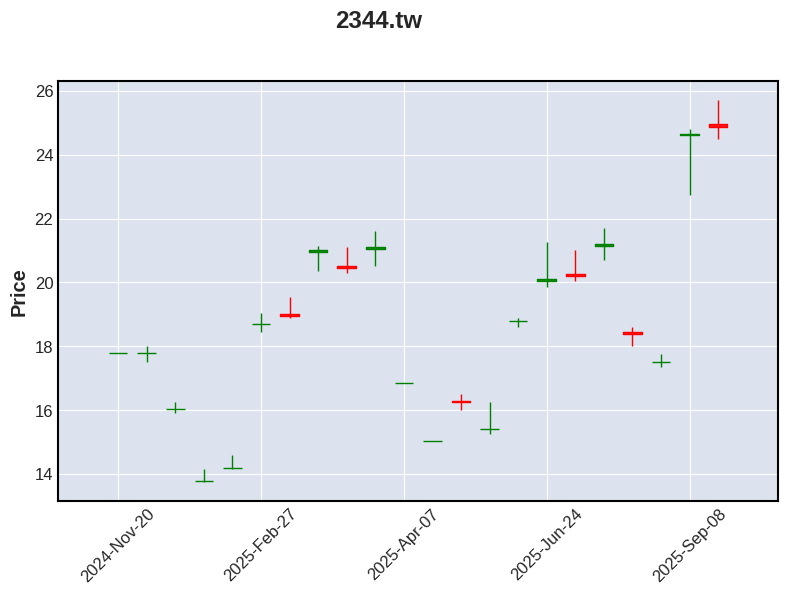

In [16]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [17]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [18]:
# 標籤: 預測未來1天的價格，舉例說明:用技術指標預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# # 使用特徵
X = df[['20_SMA', 'RSI', 'MACD']] #不跑linear
# 特徵與標籤 linear測試
X_20 = df[['20_SMA', 'RSI', 'MACD']]
X_8 = df[['8_SMA', 'RSI', 'MACD']]
X_60 = df[['60_SMA', 'RSI', 'MACD']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((178, 3), (178,))

In [19]:
# # 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.2 表示測試集佔全部數據的 20% --> 80% 的資料作為訓練，20% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False) #不跑linear

# 拆分訓練與測試集（保持一致）
X_train_20, X_test_20, y_train, y_test = train_test_split(X_20, y, test_size=0.2, shuffle=False)
X_train_8, X_test_8, _, _ = train_test_split(X_8, y, test_size=0.2, shuffle=False)
X_train_60, X_test_60, _, _ = train_test_split(X_60, y, test_size=0.2, shuffle=False)


# 查看拆分後訓練集和測試集的形狀
X_train_20.shape, X_test_20.shape, y_train.shape, y_test.shape
X_train_8.shape, X_test_8.shape, y_train.shape, y_test.shape
X_train_60.shape, X_test_60.shape, y_train.shape, y_test.shape



((142, 3), (36, 3), (142,), (36,))

## 3.2 線性回歸（Linear Regression）

In [20]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# # 建立並訓練線性回歸模型
# model = LinearRegression()
# model.fit(X_train, y_train)

# # 預測
# y_pred = model.predict(X_test)
# 模型1：使用 20_SMA
model_20 = LinearRegression()
model_20.fit(X_train_20, y_train)
y_pred_20 = model_20.predict(X_test_20)

# 模型2：使用 8_SMA
model_8 = LinearRegression()
model_8.fit(X_train_8, y_train)
y_pred_8 = model_8.predict(X_test_8)

# 模型3：使用 60_SMA
model_60 = LinearRegression()
model_60.fit(X_train_60, y_train)
y_pred_60 = model_60.predict(X_test_60)

# # 評估
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# print(f"線性回歸模型RMSE: {rmse:.2f}")
rmse_20 = np.sqrt(mean_squared_error(y_test, y_pred_20))
rmse_8 = np.sqrt(mean_squared_error(y_test, y_pred_8))
rmse_60 = np.sqrt(mean_squared_error(y_test, y_pred_60))
print(f"RMSE (20_SMA): {rmse_20:.2f}")
print(f"RMSE (8_SMA): {rmse_8:.2f}")
print(f"RMSE (60_SMA): {rmse_60:.2f}")

# 使用模型進行未來價格走勢預測
future_pred = model_20.predict(X_20[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格(20_SMA): {future_pred[0]:.2f}")
future_pred = model_8.predict(X_8[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格(8_SMA): {future_pred[0]:.2f}")
future_pred = model_60.predict(X_60[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格(60_SMA): {future_pred[0]:.2f}")

RMSE (20_SMA): 1.90
RMSE (8_SMA): 2.07
RMSE (60_SMA): 1.96
線性回歸模型預測未來1天的價格(20_SMA): 28.29
線性回歸模型預測未來1天的價格(8_SMA): 27.79
線性回歸模型預測未來1天的價格(60_SMA): 27.99


#比較不同SMA套用到模型的差異

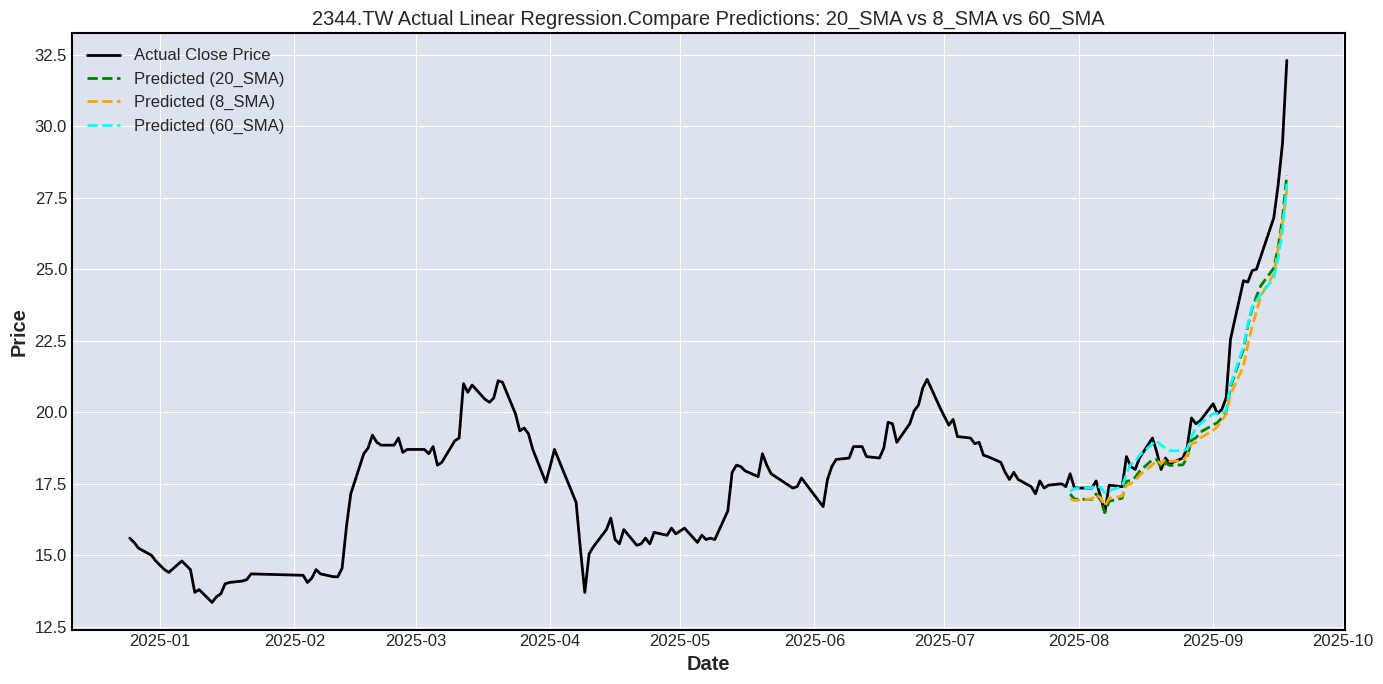

In [21]:
# # 畫出測試集的實際價格與預測價格走勢圖
# plt.figure(figsize=(14, 7))
# plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
# plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
# plt.xlabel('Date')
# plt.ylabel('Price')
# plt.title('2344.TW Actual vs Predicted Prices on Test Set')
# # plt.title('2230.TW Actual vs Predicted Prices on Test Set')#
# plt.legend()
# plt.grid(True)
# plt.show()
# 🎨 畫圖比較預測差異
plt.figure(figsize=(14, 7))

# 實際收盤價
plt.plot(df['Date'], df['Close'], label='Actual Close Price', color='black', linewidth=2)

# 預測線1（20_SMA 為基礎）
plt.plot(df['Date'][-len(y_test):], y_pred_20, label='Predicted (20_SMA)', linestyle='--', color='green')

# 預測線2（8_SMA 為基礎）
plt.plot(df['Date'][-len(y_test):], y_pred_8, label='Predicted (8_SMA)', linestyle='--', color='orange')

plt.plot(df['Date'][-len(y_test):], y_pred_60, label='Predicted (60_SMA)', linestyle='--', color='cyan')

# 圖表設定
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW Actual Linear Regression.Compare Predictions: 20_SMA vs 8_SMA vs 60_SMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.2 決策樹（Decision Tree）

In [22]:
from sklearn.tree import DecisionTreeRegressor

# 建立並訓練決策數模型
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"決策樹模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"決策樹模型預測未來{n}天的價格: {future_pred[0]:.2f}")

決策樹模型RMSE: 4.30
決策樹模型預測未來1天的價格: 19.95


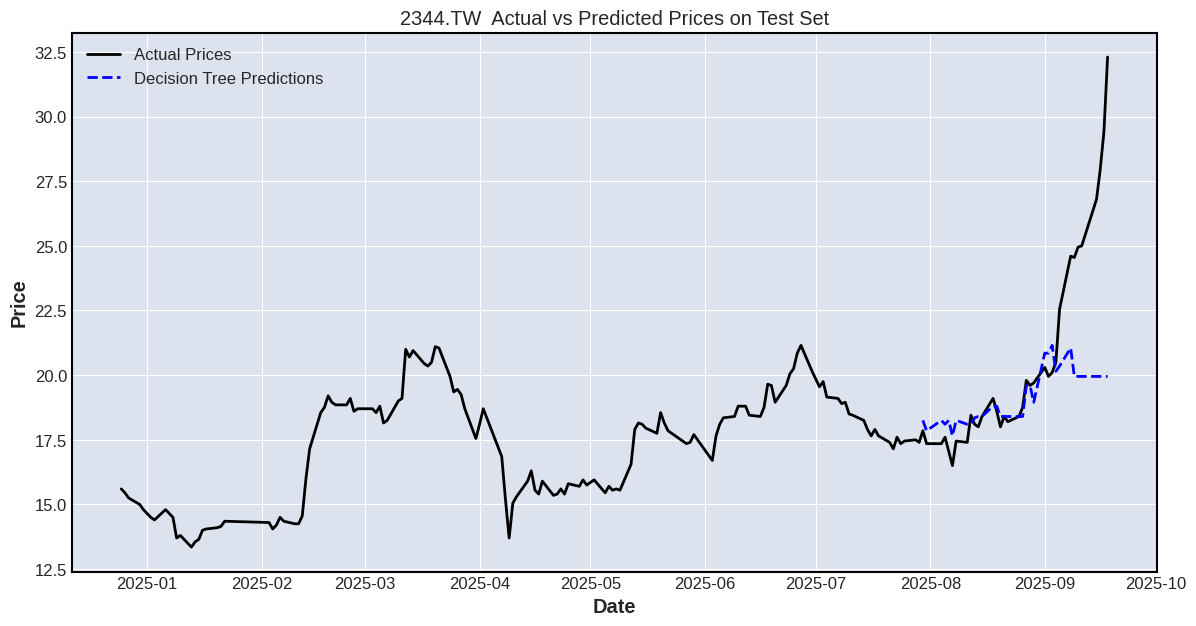

In [23]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Decision Tree Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW  Actual vs Predicted Prices on Test Set')
# plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 隨機森林（Random Forest）

In [24]:
# 引入隨機森林模型
from sklearn.ensemble import RandomForestRegressor

# 建立並訓練決策數模型
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"隨機森林模型RMSE: {rmse:.2f}")

future_pred = model.predict(X[-1:])
print(f"隨機森林模型預測未來{n}天的價格: {future_pred[0]:.2f}")

隨機森林模型RMSE: 4.18
隨機森林模型預測未來1天的價格: 20.22


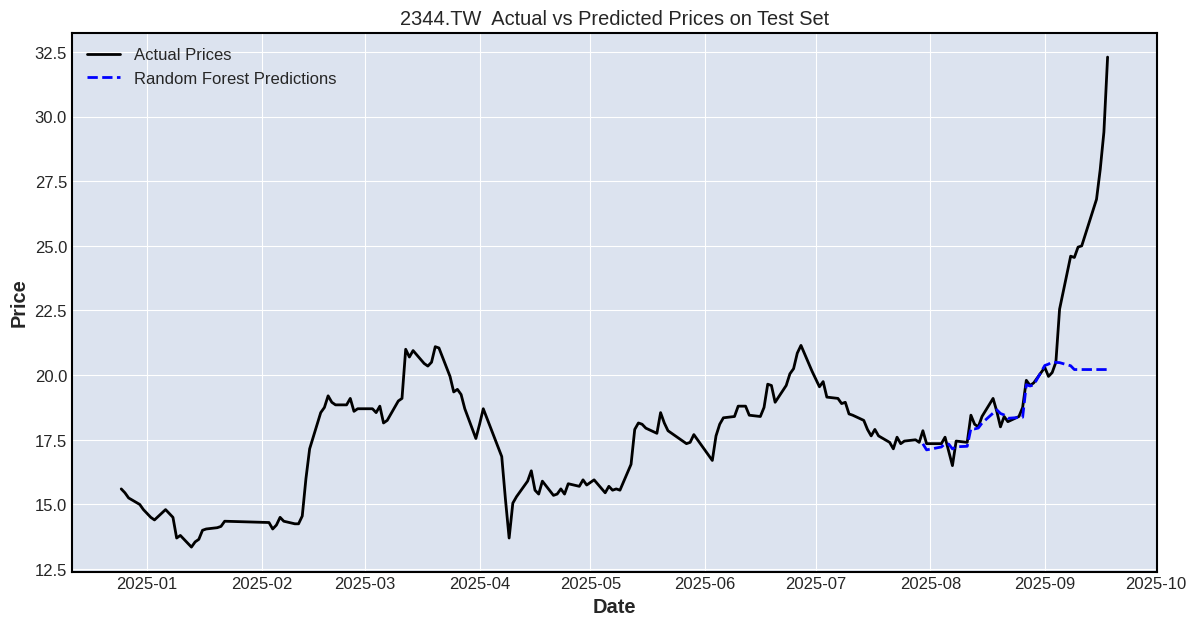

In [25]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Random Forest Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW  Actual vs Predicted Prices on Test Set')
# plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

#模型測試-XGBoost

📈 XGBoost 模型 RMSE: 3.61
🧠 XGBoost 模型預測未來 1 天的價格: 20.05


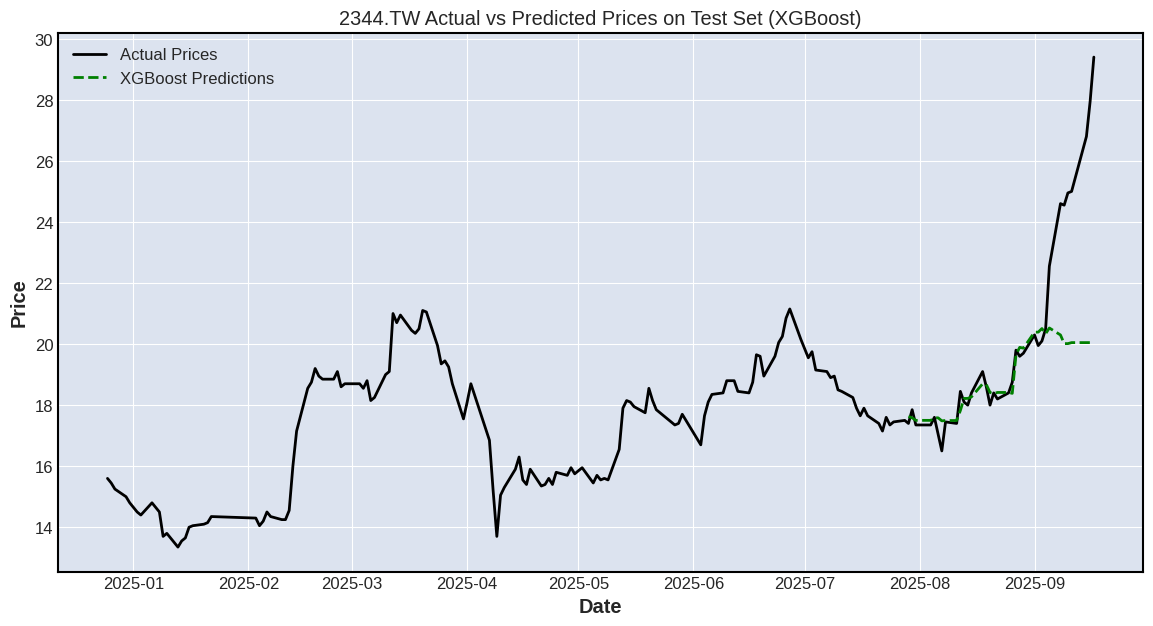

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

# 假設 df 已包含技術指標與 'Date' 欄位
n = 1
df['Future_Price'] = df['Close'].shift(-n)
df.dropna(inplace=True)

# 特徵與標籤
X = df[['20_SMA', 'RSI', 'MACD']]
y = df['Future_Price']

# 資料拆分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 建立 XGBoost 模型
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # 回歸任務常用
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"📈 XGBoost 模型 RMSE: {rmse:.2f}")

# 預測未來價格（使用最新一筆特徵）
future_pred = model.predict(X[-1:])
print(f"🧠 XGBoost 模型預測未來 {n} 天的價格: {future_pred[0]:.2f}")

# 畫圖比較實際與預測價格
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='XGBoost Predictions', linestyle='--', color='green')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW Actual vs Predicted Prices on Test Set (XGBoost)')
plt.legend()
plt.grid(True)
plt.show()


#模型測試-LightGBM

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143
[LightGBM] [Info] Number of data points in the train set: 140, number of used features: 3
[LightGBM] [Info] Start training from score 17.312500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

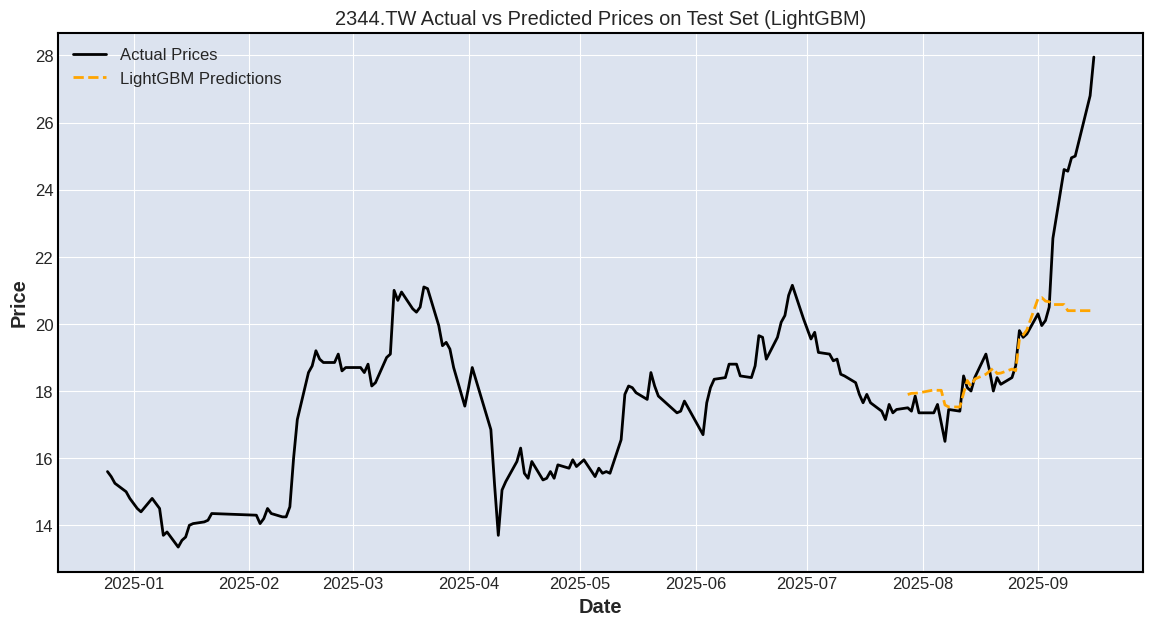

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

# 未來 1 天的收盤價作為標籤
n = 1
df['Future_Price'] = df['Close'].shift(-n)
df.dropna(inplace=True)

# 特徵與標籤
X = df[['20_SMA', 'RSI', 'MACD']]
y = df['Future_Price']

# 拆分訓練 / 測試集（不打亂順序）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # 建立 LightGBM 模型
# model = lgb.LGBMRegressor(
#     objective='regression',
#     num_leaves=31,
#     learning_rate=0.05,
#     n_estimators=100,
#     random_state=42
# )
model = lgb.LGBMRegressor(
    num_leaves=7,        # 更小的葉節點數
    min_data_in_leaf=10, # 降低分裂門檻
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=42
)
# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"📈 LightGBM 模型 RMSE: {rmse:.2f}")

# 預測最新一天未來價格
future_pred = model.predict(X[-1:])
print(f"🧠 LightGBM 預測未來 {n} 天的價格: {future_pred[0]:.2f}")

# 畫圖比較實際與預測價格
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='LightGBM Predictions', linestyle='--', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2344.TW Actual vs Predicted Prices on Test Set (LightGBM)')
plt.legend()
plt.grid(True)
plt.show()
